<h1> Instacart Market Basket Analysis </h1>

<p> <b>Objective:</b> To explore the datasets and see how customers are purchasing products and identifying trends. Using various methods of data exploration and vizualization.</p>


<h2>Table of Contents </h2>
<p> 1. Importing the libraries and datasets <br>
    2. Data Overview <br>
    3. Data Preparation<br>
    4. Exploratory Data Analysis <br>

<h3> Importing the libraries and datasets </h3>

<p> The first step is to import the libraries and datasets. </p>

<p> <b>Libraries:</b> pandas, matplotlib, seaborn </p>

<p> <b>Datasets:</b> aisles, departments, order_products, orders, products </p>

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data files and assign to variables
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

<h3> Data Overview </h3>

<p> The next step is to get a brief overview of the data. </p>


In [3]:
orders.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
aisles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [6]:
departments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


In [7]:
order_products.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<h3> Conclusion </h3>

<p> As we can see we have some missing data in the following dataframes. </p>

<p> <b>orders:</b> 28,819 missing values in the column 'days_since_prior_order' <br>
    <b>products:</b> 1,258 missing values in the column 'product_name'</p>
    <b>aisles:</b> No missing data <br>
    <b>departments:</b> No missing data <br>
    <b>order_products:</b> 836 missing values in the column 'add_to_cart_order' <br>

<h2> Data Preparation </h2>

<p> The next two steps are to prepare the data for analysis. </p>

<p> <b> Step 1: </b> Find and remove any duplicate data from the datasets. </p>

<p> <b> Step 2: </b> Remove any missing data from the datasets. </p>


## Find and remove duplicate values (and describe why you make your choices)

### `orders` data frame

In [8]:
# Check for duplicated orders
orders.duplicated().sum()

15

In [9]:
# Check for all orders placed Wednesday at 2:00 AM 
# I am going to assume that 0 = Sunday
orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
...,...,...,...,...,...,...
457013,3384021,14881,6,3,2,30.0
458816,910166,164782,18,3,2,4.0
459635,1680532,106435,6,3,2,21.0
468324,222962,54979,59,3,2,3.0


In [10]:
# Remove duplicate orders
orders = orders.drop_duplicates()

In [11]:
# Double check for duplicate rows
orders.duplicated().sum()


0

In [12]:
# Double check for duplicate order IDs only
orders['order_id'].duplicated().sum()


0

### `products` data frame

In [13]:
# Check for fully duplicate rows
products.duplicated().sum()

0

In [14]:
# Check for just duplicate product IDs
products['product_id'].duplicated().sum()


0

In [15]:
# Check for just duplicate product names (convert names to lowercase to compare better)
products['product_name'].str.lower().duplicated().sum()


1361

In [16]:
# Check for duplicate product names that aren't missing
products[products['product_name'].str.lower().duplicated(keep=False)].sort_values('product_name').head(10)


,product_id,product_name,aisle_id,department_id
31844,31845,18-In-1 Hemp Peppermint Pure-Castile Soap,25,11
23339,23340,18-in-1 Hemp Peppermint Pure-Castile Soap,25,11
19941,19942,Aged Balsamic Vinegar Of Modena,19,13
13152,13153,Aged Balsamic Vinegar of Modena,19,13
22582,22583,Albacore Solid White Tuna In Water,95,15
24830,24831,Albacore Solid White Tuna in Water,95,15
515,516,American Cheese Slices,21,16
9037,9038,American Cheese slices,21,16
49530,49531,Anchovy Fillets In Olive Oil,95,15
12325,12326,Anchovy Fillets in Olive Oil,95,15


### `departments` data frame

In [17]:
# Check for fully duplicated rows
departments.duplicated().sum()

0

In [18]:
# Check for just duplicate department_id
departments['department_id'].duplicated().sum()

0

### `aisles` data frame

In [19]:
# Check for fully duplicated rows
aisles.duplicated().sum()

0

In [20]:
# Check for just duplicate aisle_id
aisles['aisle_id'].duplicated().sum()

0

### `order_products` data frame

In [21]:
# Check for fullly duplicate rows
order_products.duplicated().sum()

0

In [22]:
# Double check for any other tricky duplicates
order_products[['order_id', 'product_id']].duplicated().sum()

0

## Find and remove missing values


### `products` data frame

In [23]:
products.info()
# Check the null value count
products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64

In [24]:
# Are all of the missing product names associated with aisle ID 100?
products[products['product_name'].isnull()]['aisle_id'].value_counts()

100    1258
Name: aisle_id, dtype: int64

In [25]:
# Are all of the missing product names associated with department ID 21?
products[products['product_name'].isnull()]['department_id'].value_counts()

21    1258
Name: department_id, dtype: int64

In [26]:
# What is this ailse and department?
display(aisles[aisles['aisle_id'] == 100])
display(departments[departments['department_id'] == 21])

,aisle_id,aisle
99,100,missing


,department_id,department
20,21,missing


In [27]:
# Fill missing product names with 'Unknown'
products['product_name'] = products['product_name'].fillna('Unknown')
# Double check the null values
products.isnull().sum()

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

### `orders` data frame

In [28]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  450135 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB


In [29]:
# Are there any missing values where it's not a customer's first order?
orders[orders['days_since_prior_order'].isnull() & (orders['order_number'] > 1)]

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


### `order_products` data frame

In [30]:
order_products.info(show_counts=True)
# Check the null value count
order_products.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [31]:
# What are the min and max values in this column?
order_products['add_to_cart_order'].min(), order_products['add_to_cart_order'].max()


(1.0, 64.0)

In [32]:
# Save all order IDs with at least one missing value in 'add_to_cart_order'
missing_cart_order = order_products[order_products['add_to_cart_order'].isnull()]['order_id']


In [33]:
# Do all orders with missing values have more than 64 products?
display(order_products[order_products['order_id'].isin(missing_cart_order)]['order_id'].value_counts().head(10))
order_products[order_products['order_id'].isin(missing_cart_order)]['order_id'].value_counts().min()


61355      127
3308010    115
2136777    108
171934     104
1959075     98
1730767     95
102236      95
1800005     92
2926893     92
264710      91
Name: order_id, dtype: int64

65

In [34]:
# Replace missing values with 999 and convert column to integer type
order_products['add_to_cart_order'] = order_products['add_to_cart_order'].fillna(999).astype(int)
# Double check the total null values
order_products.isnull().sum()


order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

<h3> Conclusion </h3>

<p> As we see for the data preparation step, we have removed 15 duplicate values from the orders dataframe and 1361 duplicate values from the products dataframe (after reformating the product_name column).<br>
    Next, we have removed 1258 missing values from the products dataframe by replacing the missing values with the string 'unknown'.<br>
    Finally, we have removed 28,819 missing values from the orders dataframe by replacing the missing values with the integer 999. </p>

<h2>Exploratory Data Analysis</h2>

<p> The next step is to explore the data and see how customers are purchasing products and identifying trends. </p>



# [A] Easy (must complete all to pass)

### [A1] Verify that the `'order_hour_of_day'` and `'order_dow'` values in the `orders` tables are sensible (i.e. `'order_hour_of_day'` ranges from 0 to 23 and `'order_dow'` ranges from 0 to 6)

In [35]:
orders['order_hour_of_day'].value_counts().sort_index()

0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_hour_of_day, dtype: int64

In [36]:
orders['order_dow'].value_counts().sort_index()

0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_dow, dtype: int64

### [A2] What time of day do people shop for groceries?

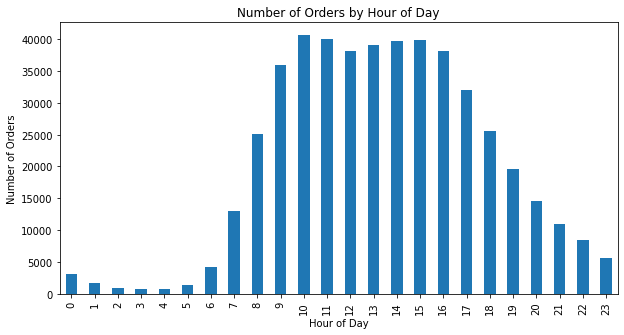

In [37]:
# Plot the orders by hour of day
orders['order_hour_of_day'].value_counts().sort_index().plot.bar(figsize = (10, 5))
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day')
plt.show()

<p> As we can see, the most popular time to shop for groceries is between 10am and 4pm. While overnight people rarely order.</p>

### [A3] What day of the week do people shop for groceries?

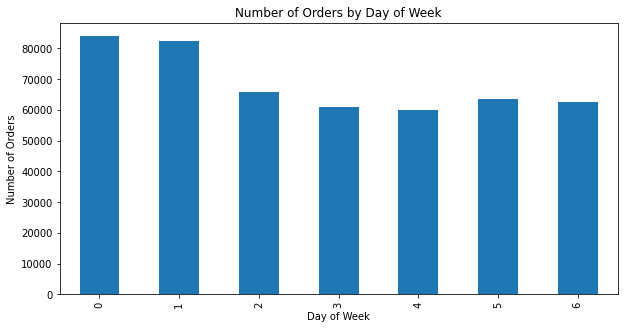

In [38]:
# Plot the orders by day of week
orders['order_dow'].value_counts().sort_index().plot.bar(figsize = (10, 5))
plt.xlabel('Day of Week')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Day of Week')
plt.show()

<p> As we can see, the most popular days to shop for groceries is Sunday and Monday. While Wednesday and Thursday are the least popular days to shop for groceries.</p>

### [A4] How long do people wait until placing another order?

In [39]:
# Find the min, max, average days since prior order
orders['days_since_prior_order'].min(), orders['days_since_prior_order'].max(), orders['days_since_prior_order'].mean()


(0.0, 30.0, 11.101813900274362)

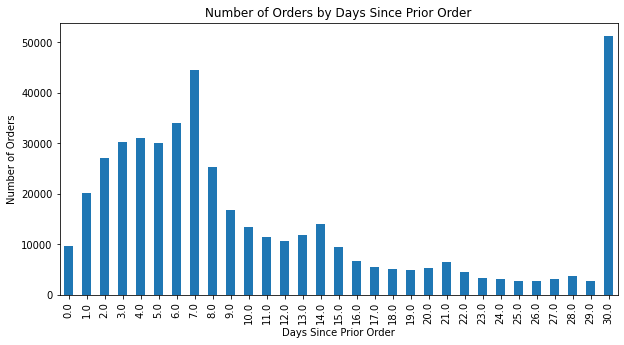

In [40]:
# Plot the distribution
orders['days_since_prior_order'].value_counts().sort_index().plot.bar(figsize = (10, 5))
plt.xlabel('Days Since Prior Order')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Days Since Prior Order')
plt.show()

<p> As we can see, many customers wait 7 days or less before placing another order. While some customers wait longer.<br>
After calculating we can see that the average customer wait time is about 11 days to reorder.</p>

# [B] Medium (must complete all to pass)

### [B1] Is there a difference in `'order_hour_of_day'` distributions on Wednesdays and Saturdays? Plot the histograms for both days and describe the differences that you see.

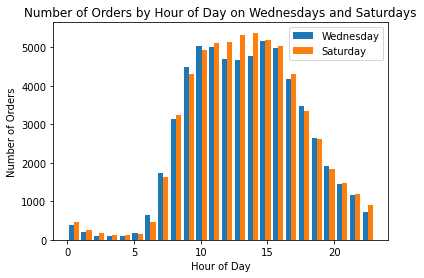

In [41]:
# Plot Wednesday vs Saturday
b, bins, patches = plt.hist(
    [orders[orders['order_dow'] == 3]['order_hour_of_day'], orders[orders['order_dow'] == 6]['order_hour_of_day']],
    bins = 24,
    label = ['Wednesday', 'Saturday'],
)
plt.legend()
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Hour of Day on Wednesdays and Saturdays')
plt.show()

It would seem the number of orders are about the same. The only difference is about noon on Saturday orders are increased.

### [B2] What's the distribution for the number of orders per customer?

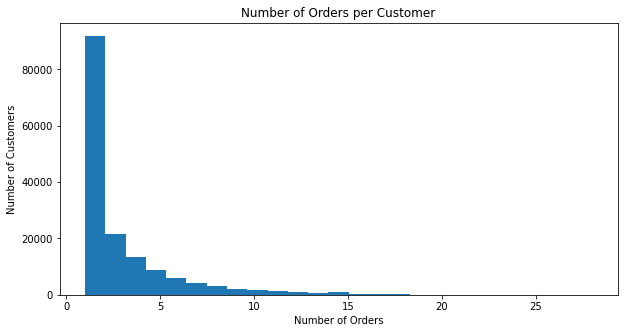

In [58]:
# Plot the distribution
orders.groupby('user_id')['order_id'].nunique().plot.hist(bins = 25, figsize = (10, 5))
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Number of Orders per Customer')
plt.show()

In [43]:
display(orders.groupby('user_id')['order_number'].max().value_counts().head(5))
display(orders.groupby('user_id')['order_number'].max().mean())

4    12368
3    10510
5    10406
6     9194
2     9113
Name: order_number, dtype: int64

15.577570710824013

<p> As we can see, the distribution for the number of orders per customers is skewed to the right. Where the top 5 orders per customer is 4, 3, 5, 6, and 2. After that the number of orders per customer starts to increase all the way to 100. We can also determind after calculating that the average number of orders per customer is 15.</p>

### [B3] What are the top 20 popular products (display their id and name)?

In [45]:
# Merge the data frames
merged_products = pd.merge(order_products, products, on = 'product_id', how = 'left')
merged_products.head()



,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16


In [46]:
# Find the count of the product_name
merged_products.groupby(['product_name', 'product_id'])['product_name'].count().sort_values(ascending = False).head(20)

product_name              product_id
Banana                    24852         66050
Bag of Organic Bananas    13176         53297
Organic Strawberries      21137         37039
Organic Baby Spinach      21903         33971
Organic Hass Avocado      47209         29773
Organic Avocado           47766         24689
Large Lemon               47626         21495
Strawberries              16797         20018
Limes                     26209         19690
Organic Whole Milk        27845         19600
Organic Raspberries       27966         19197
Organic Yellow Onion      22935         15898
Organic Garlic            24964         15292
Organic Zucchini          45007         14584
Organic Blueberries       39275         13879
Cucumber Kirby            49683         13675
Organic Fuji Apple        28204         12544
Organic Lemon             5876          12232
Apple Honeycrisp Organic  8277          11993
Organic Grape Tomatoes    40706         11781
Name: product_name, dtype: int64

<p> We can determine from looking at the top 20 popular products that the top 5 products are bananas, bag of organic bananas, organic strawberries, organic baby spinach, and organic hass avocado. After that the top 20 products are a mix of fruits and vegetables.</p>

# [C] Hard (must complete at least two to pass)

### [C1] How many items do people typically buy in one order? What does the distribution look like?

In [47]:
# Merge the data frames
order_frequency = pd.merge(orders, order_products, on = 'order_id', how = 'left')
order_frequency.reset_index()
display(order_frequency.head())

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048.0,1.0,1.0
1,1515936,183418,11,6,13,30.0,47766.0,3.0,1.0
2,1515936,183418,11,6,13,30.0,45066.0,9.0,0.0
3,1515936,183418,11,6,13,30.0,24082.0,11.0,0.0
4,1515936,183418,11,6,13,30.0,24363.0,4.0,0.0


In [48]:
# Find the mean
order_frequency['order_id'].value_counts().mean()

9.54983589169687

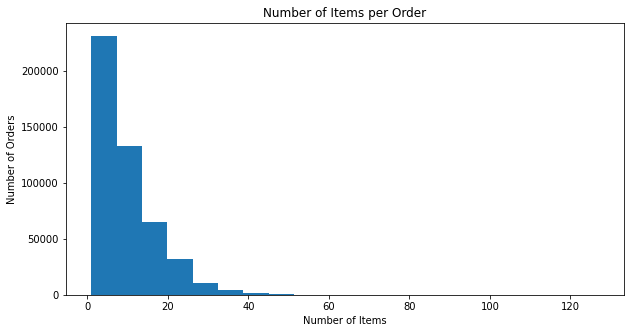

In [49]:
# Plot the distribution
order_frequency['order_id'].value_counts().plot.hist(bins = 20, figsize = (10, 5))
plt.xlabel('Number of Items')
plt.ylabel('Number of Orders')
plt.title('Number of Items per Order')
plt.show()

### [C2] What are the top 20 items that are reordered most frequently (display their names and product IDs)?

In [50]:
# Find the sum of reorders
merged_products.groupby(['product_name', 'product_id'])['reordered'].sum().sort_values(ascending = False).head(20)

product_name              product_id
Banana                    24852         55763
Bag of Organic Bananas    13176         44450
Organic Strawberries      21137         28639
Organic Baby Spinach      21903         26233
Organic Hass Avocado      47209         23629
Organic Avocado           47766         18743
Organic Whole Milk        27845         16251
Large Lemon               47626         15044
Organic Raspberries       27966         14748
Strawberries              16797         13945
Limes                     26209         13327
Organic Yellow Onion      22935         11145
Organic Garlic            24964         10411
Organic Zucchini          45007         10076
Cucumber Kirby            49683          9538
Organic Fuji Apple        28204          8989
Apple Honeycrisp Organic  8277           8836
Organic Blueberries       39275          8799
Organic Lemon             5876           8412
Organic Half & Half       49235          8389
Name: reordered, dtype: int64

### [C3] For each product, what proportion of its orders are reorders?

In [51]:
# Merge the data frames
product_reorder = pd.merge(order_products, products, on = 'product_id', how = 'left')
product_reorder.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id
0,2141543,11440,17,0,Chicken Breast Tenders Breaded,129,1
1,567889,1560,1,1,Bag Of Ice,37,1
2,2261212,26683,1,1,Cafe Latte Pure Lightly Sweetened Iced Coffee ...,91,16
3,491251,8670,35,1,Diced Tomatoes,81,15
4,2571142,1940,5,1,Organic 2% Reduced Fat Milk,84,16


In [52]:
# Find the mean
product_reorder.groupby(['product_id', 'product_name'])['reordered'].mean()

product_id  product_name                                                     
1           Chocolate Sandwich Cookies                                           0.564286
2           All-Seasons Salt                                                     0.000000
3           Robust Golden Unsweetened Oolong Tea                                 0.738095
4           Smart Ones Classic Favorites Mini Rigatoni With Vodka Cream Sauce    0.510204
7           Pure Coconut Water With Orange                                       0.500000
                                                                                   ...   
49690       HIGH PERFORMANCE ENERGY DRINK                                        0.800000
49691       ORIGINAL PANCAKE & WAFFLE MIX                                        0.430556
49692       ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR                      0.416667
49693       SPRING WATER BODY WASH                                               0.440000
49694       BURRITO- S

### [C4] For each customer, what proportion of their products ordered are reorders?

In [53]:
# Merge the data frames
customer_reorder = pd.merge(orders, order_products, on = 'order_id', how = 'left')
customer_reorder.head()


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048.0,1.0,1.0
1,1515936,183418,11,6,13,30.0,47766.0,3.0,1.0
2,1515936,183418,11,6,13,30.0,45066.0,9.0,0.0
3,1515936,183418,11,6,13,30.0,24082.0,11.0,0.0
4,1515936,183418,11,6,13,30.0,24363.0,4.0,0.0


In [54]:
# plot the customer reorder proportion
customer_reorder.groupby('user_id')['reordered'].mean()


user_id
2         0.038462
4         0.000000
5         0.666667
6         0.000000
7         0.928571
            ...   
206203    0.222222
206206    0.714286
206207    0.891304
206208    0.696000
206209    0.320000
Name: reordered, Length: 157437, dtype: float64

### [C5] What are the top 20 items that people put in their carts first? 

In [55]:
# Find the count of add_to_cart_order
merged_products=merged_products[merged_products['add_to_cart_order'] == 1]
merged_products.groupby(['product_id', 'product_name'])['add_to_cart_order'].count().sort_values(ascending = False).head(20)

product_id  product_name               
24852       Banana                         15562
13176       Bag of Organic Bananas         11026
27845       Organic Whole Milk              4363
21137       Organic Strawberries            3946
47209       Organic Hass Avocado            3390
21903       Organic Baby Spinach            3336
47766       Organic Avocado                 3044
19660       Spring Water                    2336
16797       Strawberries                    2308
27966       Organic Raspberries             2024
44632       Sparkling Water Grapefruit      1914
49235       Organic Half & Half             1797
47626       Large Lemon                     1737
196         Soda                            1733
38689       Organic Reduced Fat Milk        1397
26209       Limes                           1370
12341       Hass Avocados                   1340
5785        Organic Reduced Fat 2% Milk     1310
27086       Half & Half                     1309
43352       Raspberries      